# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Ria Kristi
- Email: riakristibasri@gmail.com
- Id Dicoding: riakrst

# Persiapan

## Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


import warnings
warnings.filterwarnings('ignore')

## Menyiapkan data yang akan digunakan
### Data Loading

Dataset yang digunakan datapat diakses pada tautan berikut : https://github.com/dicodingacademy/dicoding_dataset/blob/main/students_performance/data.csv

In [2]:
df = pd.read_csv('students_performance.csv', delimiter=';')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Data Understanding

# Students' Performance

A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies. The dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. The data is used to build classification models to predict students' dropout and academic sucess.

| Column name | Description |
| --- | --- |
|Marital status | The marital status of the student. (Categorical) 1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated |
| Application mode | The method of application used by the student. (Categorical) 1 - 1st phase - general contingent 2 - Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island) 7 - Holders of other higher courses 10 - Ordinance No. 854-B/99 15 - International student (bachelor) 16 - 1st phase - special contingent (Madeira Island) 17 - 2nd phase - general contingent 18 - 3rd phase - general contingent 26 - Ordinance No. 533-A/99, item b2) (Different Plan) 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 39 - Over 23 years old 42 - Transfer 43 - Change of course 44 - Technological specialization diploma holders 51 - Change of institution/course 53 - Short cycle diploma holders 57 - Change of institution/course (International)|
|Application order | The order in which the student applied. (Numerical) Application order (between 0 - first choice; and 9 last choice) |
|Course | The course taken by the student. (Categorical) 33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance)|
|Daytime/evening attendance | Whether the student attends classes during the day or in the evening. (Categorical) 1 – daytime 0 - evening |
|Previous qualification| The qualification obtained by the student before enrolling in higher education. (Categorical) 1 - Secondary education 2 - Higher education - bachelor's degree 3 - Higher education - degree 4 - Higher education - master's 5 - Higher education - doctorate 6 - Frequency of higher education 9 - 12th year of schooling - not completed 10 - 11th year of schooling - not completed 12 - Other - 11th year of schooling 14 - 10th year of schooling 15 - 10th year of schooling - not completed 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 42 - Professional higher technical course 43 - Higher education - master (2nd cycle) |
|Previous qualification (grade) | Grade of previous qualification (between 0 and 200) |
| Nacionality | The nationality of the student. (Categorical) 1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian|
|Mother's qualification | The qualification of the student's mother. (Categorical) 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 22 - Technical-professional course 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)|
|Father's qualification | The qualification of the student's father. (Categorical) 1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor's Degree 3 - Higher Education - Degree 4 - Higher Education - Master's 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 13 - 2nd year complementary high school course 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 20 - Complementary High School Course 22 - Technical-professional course 25 - Complementary High School Course - not concluded 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 31 - General Course of Administration and Commerce 33 - Supplementary Accounting and Administration 34 - Unknown 35 - Can't read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle) |
| Mother's occupation | The occupation of the student's mother. (Categorical) 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 122 - Health professionals 123 - teachers 125 - Specialists in information and communication technologies (ICT) 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 171 - Skilled construction workers and the like, except electricians 173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like 175 - Workers in food processing, woodworking, clothing and other industries and crafts 191 - cleaning workers 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants |
| Father's occupation | The occupation of the student's father. (Categorical) 0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 101 - Armed Forces Officers 102 - Armed Forces Sergeants 103 - Other Armed Forces personnel 112 - Directors of administrative and commercial services 114 - Hotel, catering, trade and other services directors 121 - Specialists in the physical sciences, mathematics, engineering and related techniques 122 - Health professionals 123 - teachers 124 - Specialists in finance, accounting, administrative organization, public and commercial relations 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 135 - Information and communication technology technicians 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 154 - Protection and security services personnel 161 - Market-oriented farmers and skilled agricultural and animal production workers 163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence 171 - Skilled construction workers and the like, except electricians 172 - Skilled workers in metallurgy, metalworking and similar 174 - Skilled workers in electricity and electronics 175 - Workers in food processing, woodworking, clothing and other industries and crafts 181 - Fixed plant and machine operators 182 - assembly workers 183 - Vehicle drivers and mobile equipment operators 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants 195 - Street vendors (except food) and street service providers |
| Admission grade | Admission grade (between 0 and 200) |
| Displaced | Whether the student is a displaced person. (Categorical) 	1 – yes 0 – no |
| Educational special needs | Whether the student has any special educational needs. (Categorical) 1 – yes 0 – no |
|Debtor | Whether the student is a debtor. (Categorical) 1 – yes 0 – no|
|Tuition fees up to date | Whether the student's tuition fees are up to date. (Categorical) 1 – yes 0 – no|
|Gender | The gender of the student. (Categorical) 1 – male 0 – female |
|Scholarship holder | Whether the student is a scholarship holder. (Categorical) 1 – yes 0 – no |
|Age at enrollment | The age of the student at the time of enrollment. (Numerical)|
|International | Whether the student is an international student. (Categorical) 1 – yes 0 – no|
|Curricular units 1st sem (credited) | The number of curricular units credited by the student in the first semester. (Numerical) |
| Curricular units 1st sem (enrolled) | The number of curricular units enrolled by the student in the first semester. (Numerical) |
| Curricular units 1st sem (evaluations) | The number of curricular units evaluated by the student in the first semester. (Numerical) |
| Curricular units 1st sem (approved) | The number of curricular units approved by the student in the first semester. (Numerical) |

## Acknowledgements
Realinho,Valentim, Vieira Martins,Mónica, Machado,Jorge, and Baptista,Luís. (2021). Predict students' dropout and academic success. UCI Machine Learning Repository. https://doi.org/10.24432/C5MC89.


In [3]:
print(f"Jumlah baris dan kolom: {df.shape}")
df.info()

Jumlah baris dan kolom: (4424, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification       

In [4]:
# ringkasan statistik deskriptif dataset
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


## Exploratory Data Analysis

#### Menampilkan korelasi antar fitur

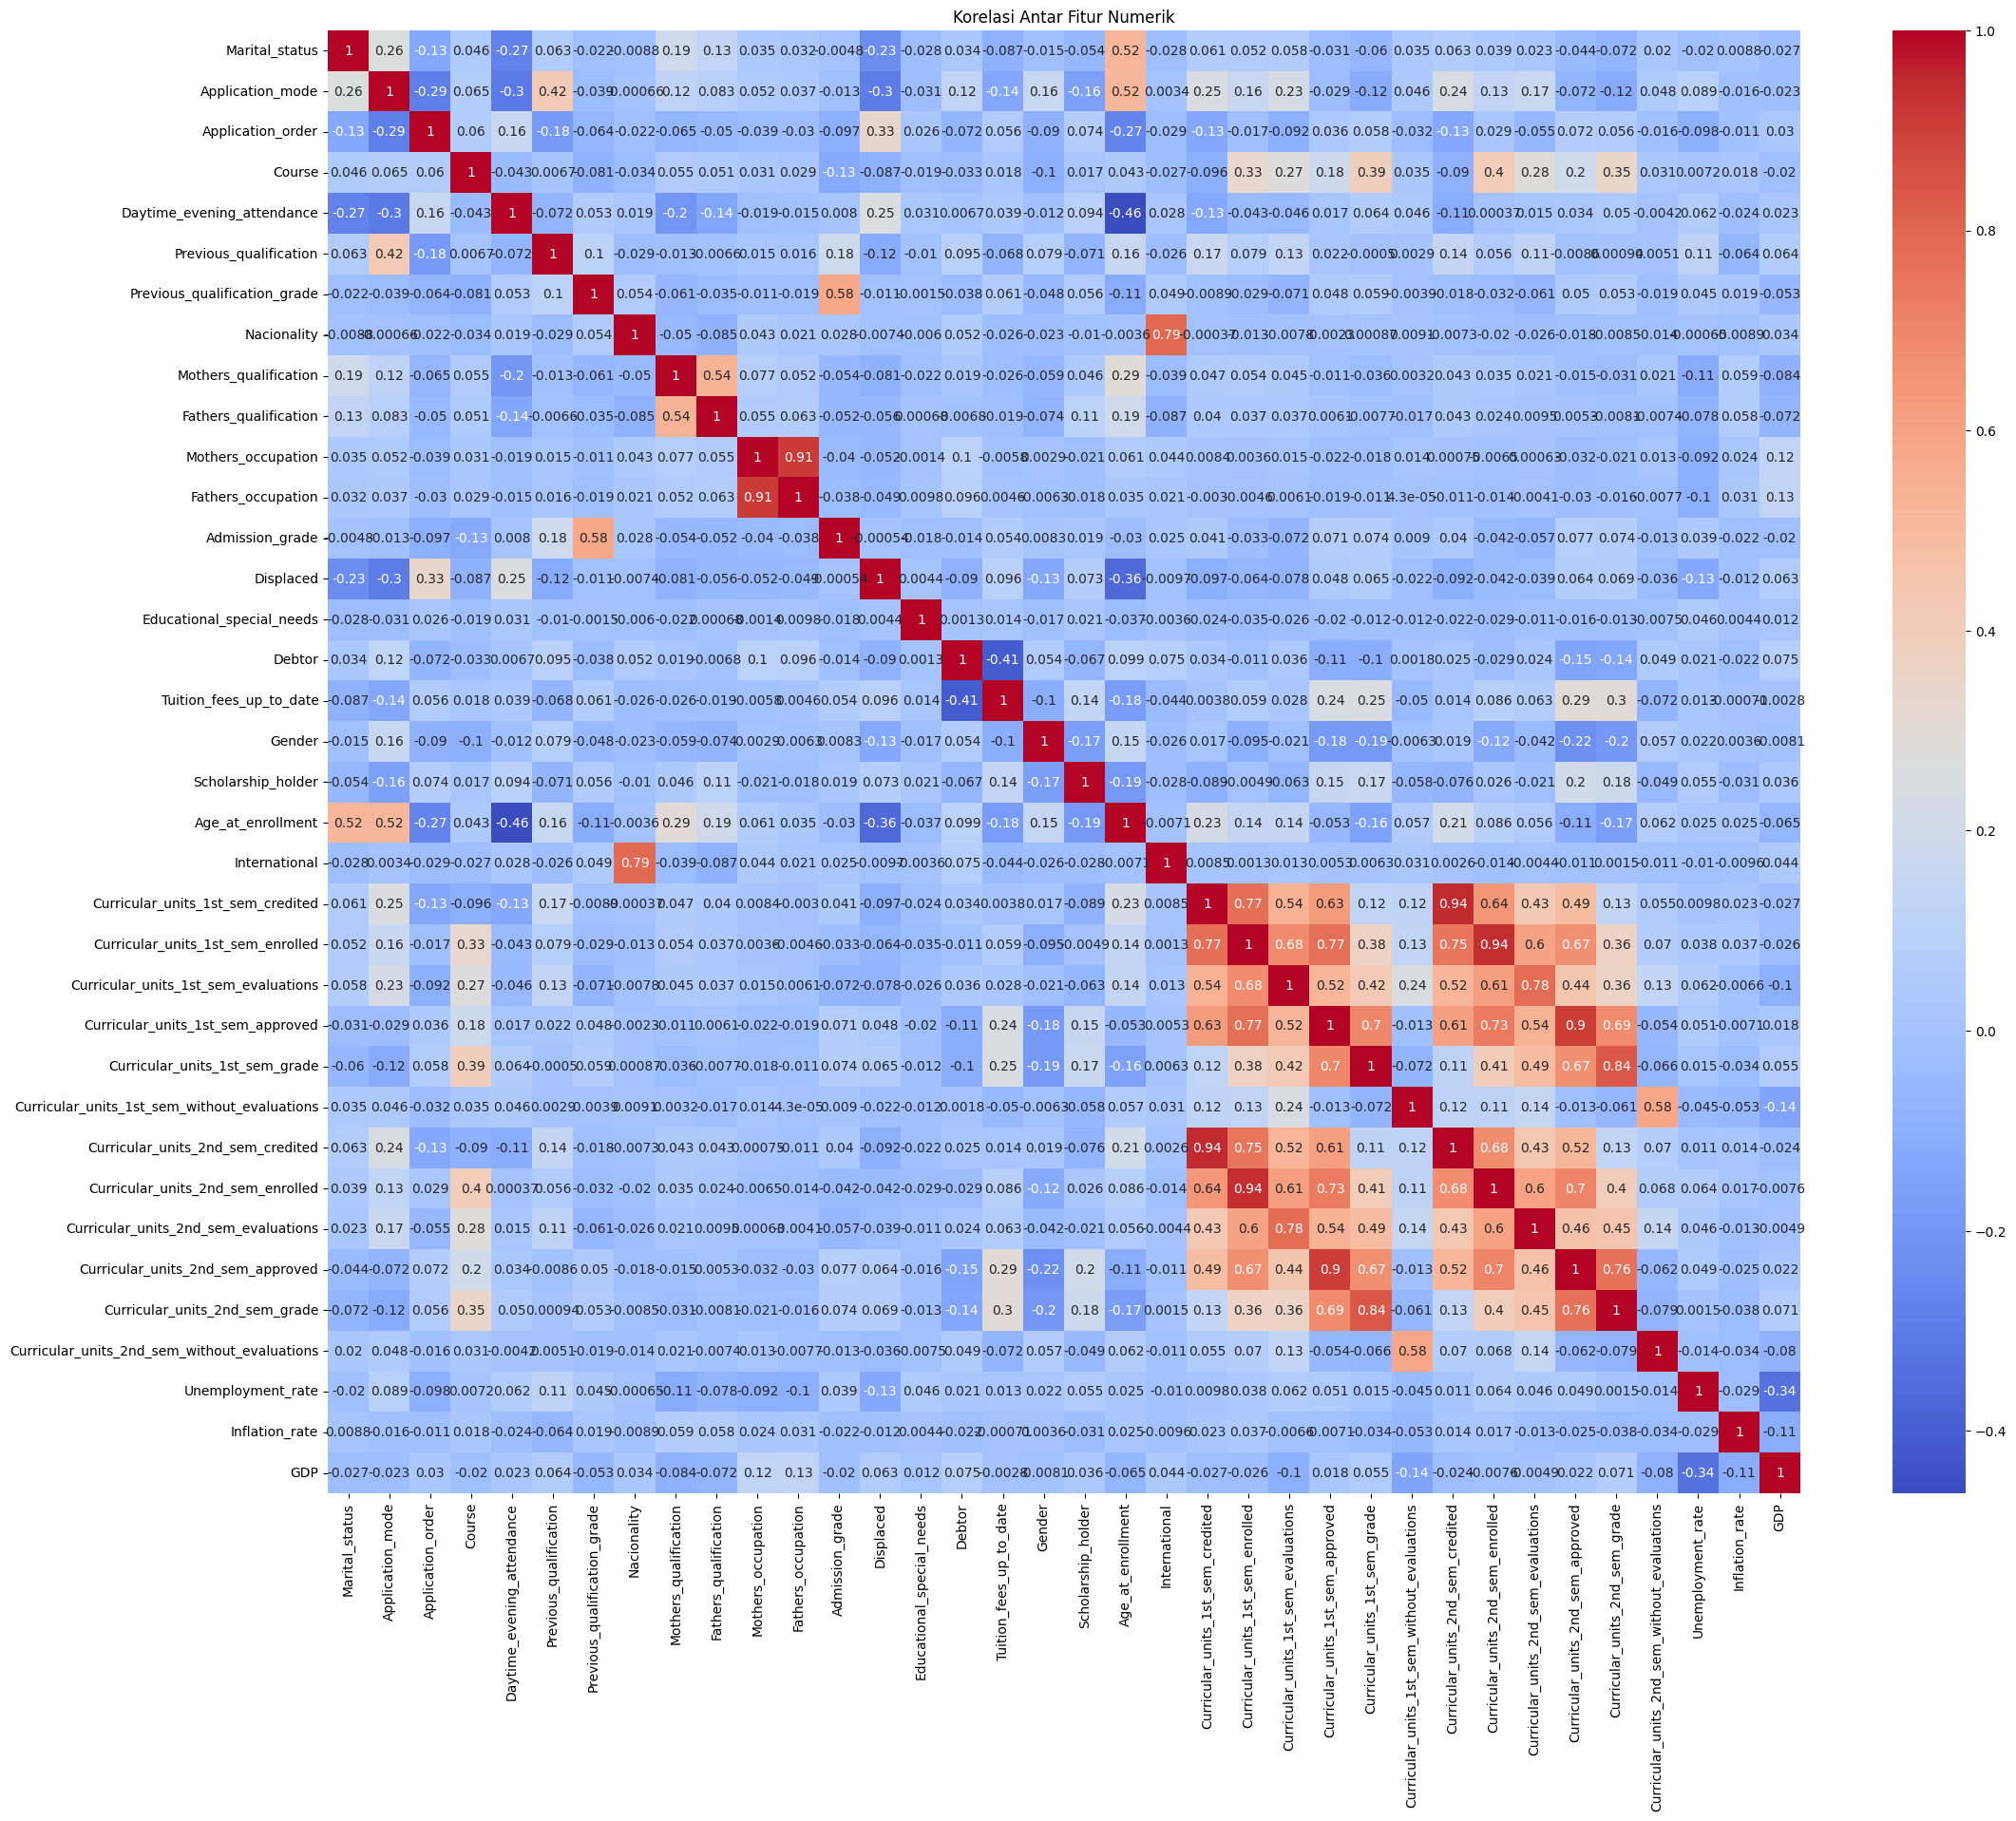

In [5]:
# Ambil fitur numerik
num_features = df.select_dtypes(include=['int64', 'float64'])

# Hitung korelasi
correlation = num_features.corr()

# Visualisasi korelasi
plt.figure(figsize=(25, 20))
sns.heatmap(correlation, cmap='coolwarm', annot=True)
plt.title('Korelasi Antar Fitur Numerik')
plt.show()

### Menampilkan histogram untuk semua kolom numerik

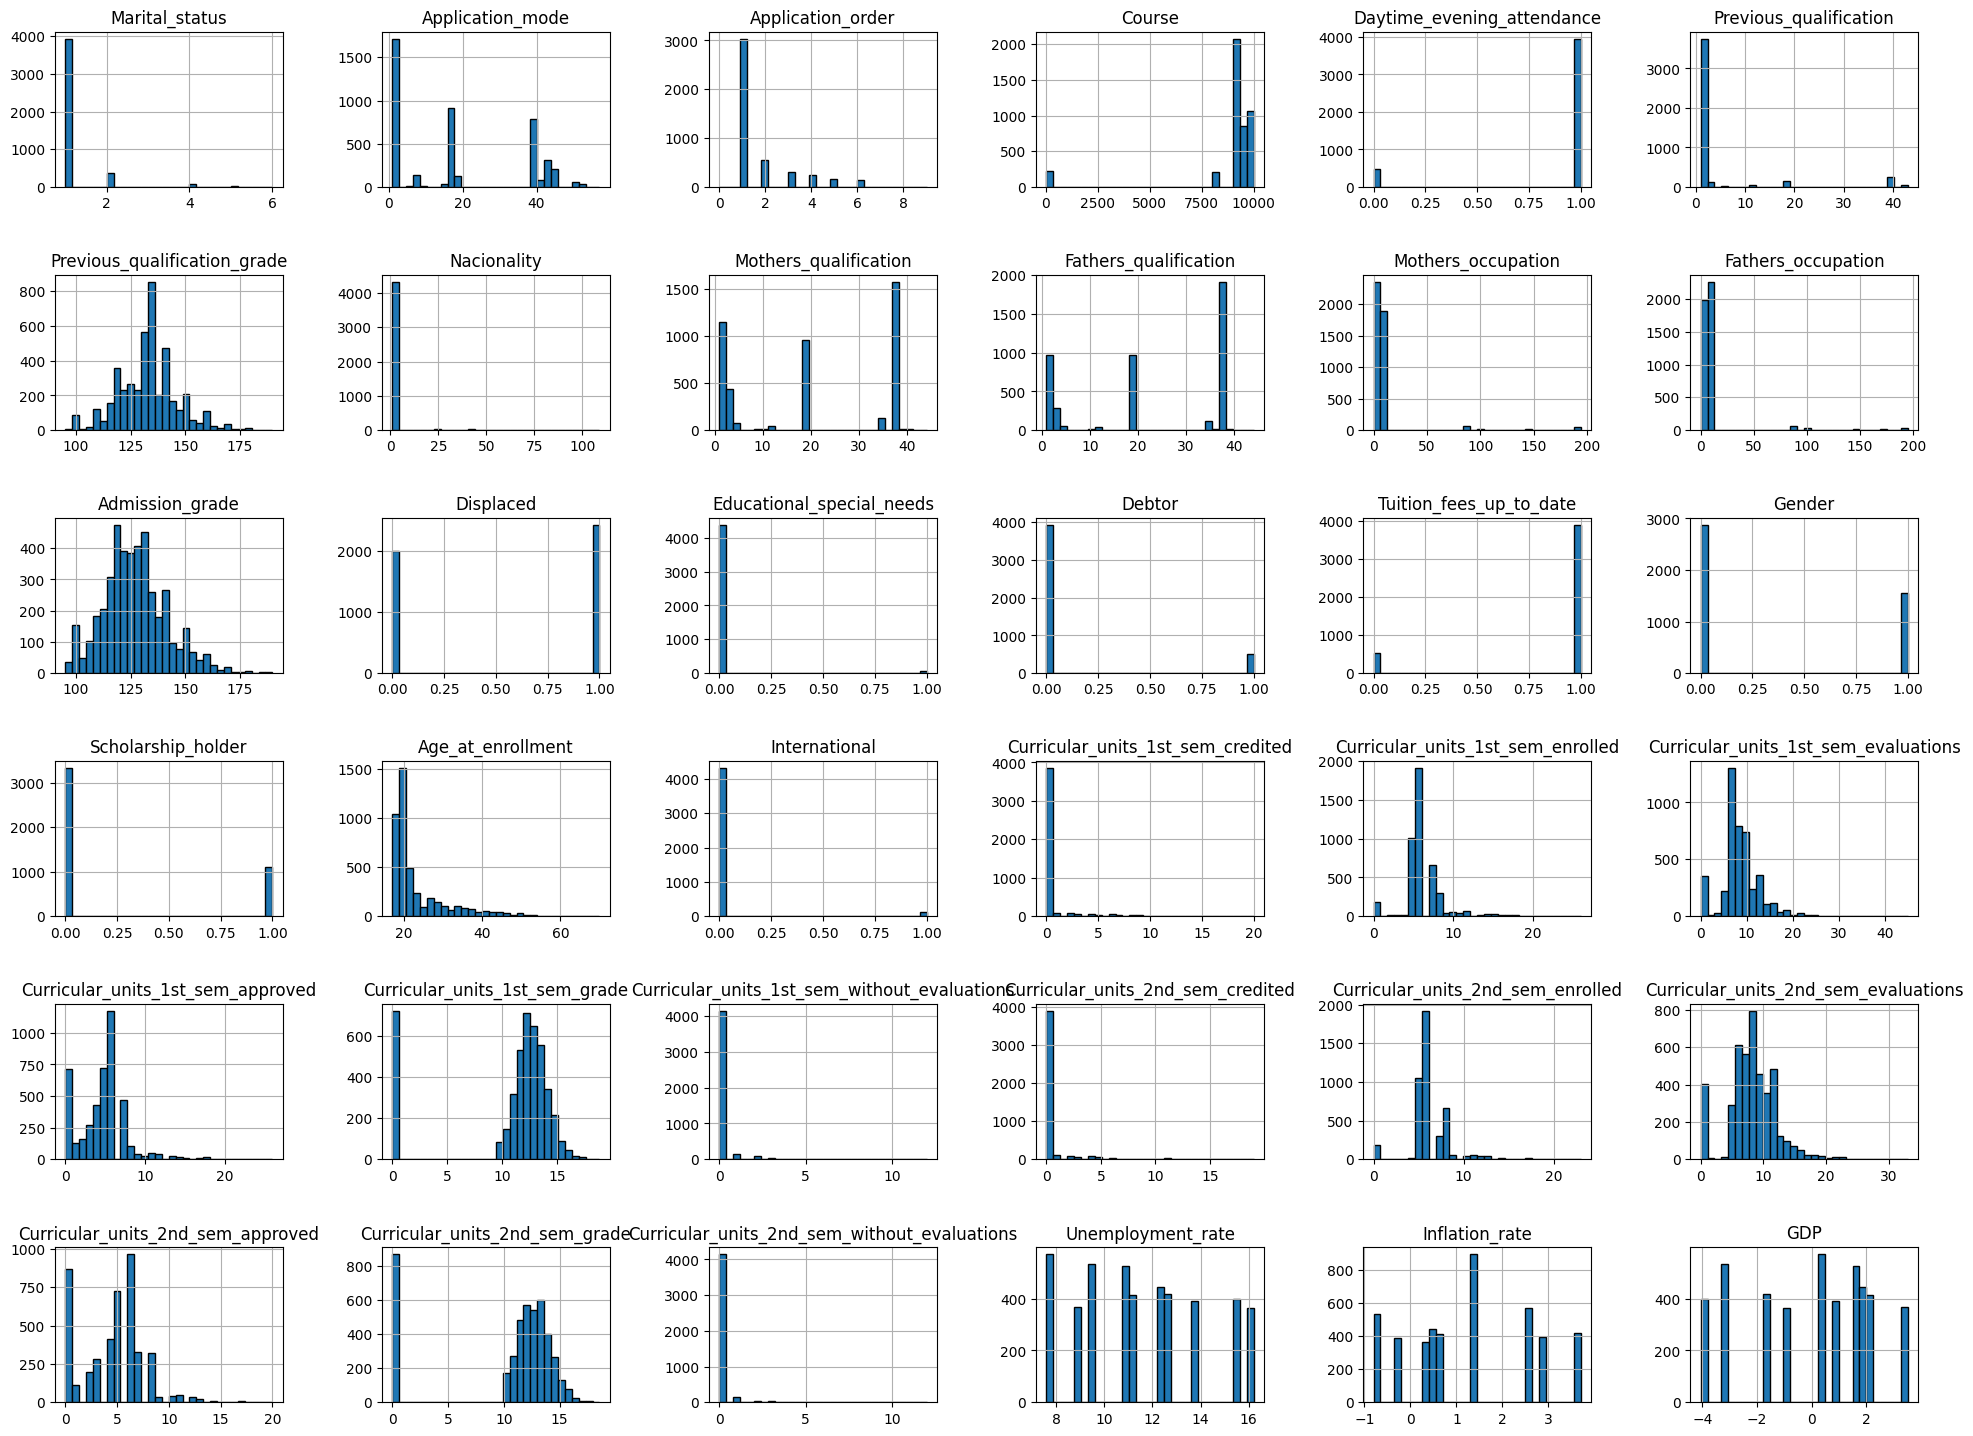

In [6]:
df.hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.tight_layout(pad=3.0)
plt.show()

### Distribusi Data

### Menampilkan Distribusi Status

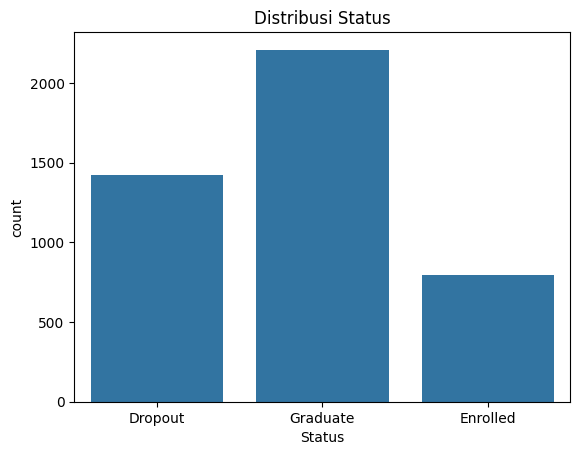

In [7]:
sns.countplot(x='Status', data=df)
plt.title('Distribusi Status')
plt.show()

### Nilai Masuk (Admission Grade)

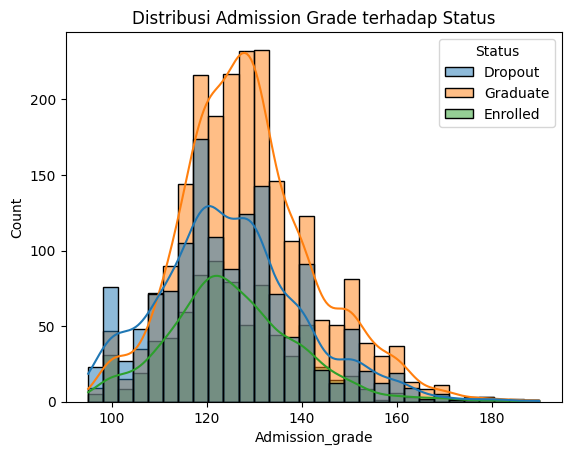

In [8]:
sns.histplot(data=df, x='Admission_grade', hue='Status', kde=True, bins=30)
plt.title('Distribusi Admission Grade terhadap Status')
plt.show()

### Distribusi Jumlah Evaluasi  Mata Kuliah Semester 1 Terhadap Status Mahasiswa
Indikasi bahwa mahasiswa aktif mengikuti dan dinilai dalam mata kuliah tersebut.

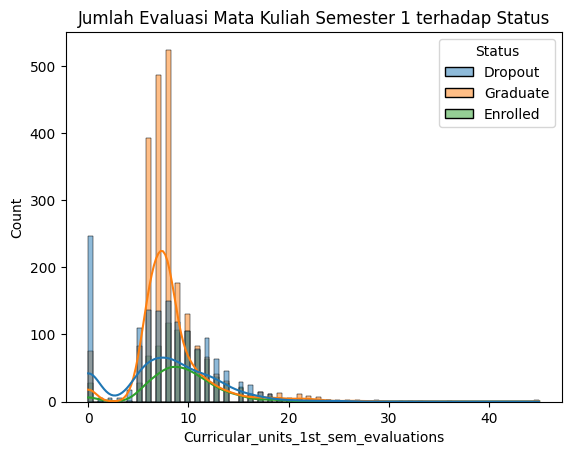

In [9]:
sns.histplot(data=df, x='Curricular_units_1st_sem_evaluations', hue='Status', kde=True)
plt.title('Jumlah Evaluasi Mata Kuliah Semester 1 terhadap Status')
plt.show()

### Distribusi Kelulusan Mata Kuliah Semester 1 terhadap Status Mahasiswa

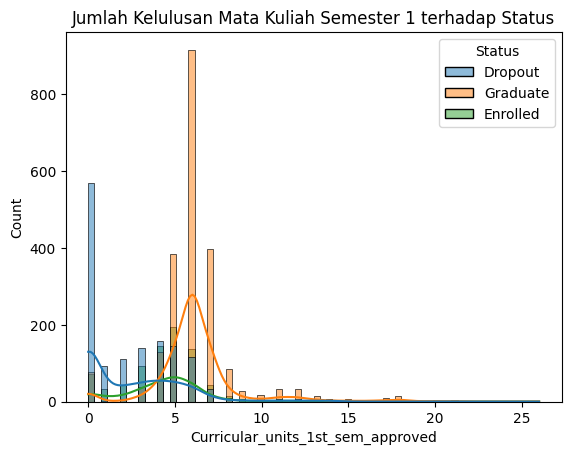

In [10]:
sns.histplot(data=df, x='Curricular_units_1st_sem_approved', hue='Status', kde=True)
plt.title('Jumlah Kelulusan Mata Kuliah Semester 1 terhadap Status')
plt.show()

### Distribusi Fitur Kategorikal dengan Status
### Gender vs Status

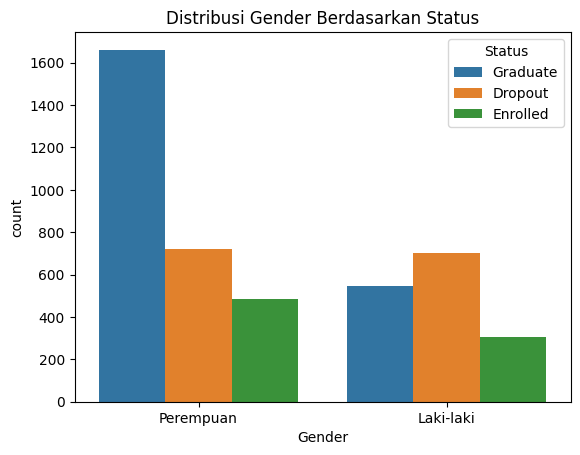

In [11]:
sns.countplot(data=df, x='Gender', hue='Status')
plt.title('Distribusi Gender Berdasarkan Status')
plt.xticks(ticks=[0, 1], labels=['Perempuan', 'Laki-laki'])
plt.show()

### Course vs Status

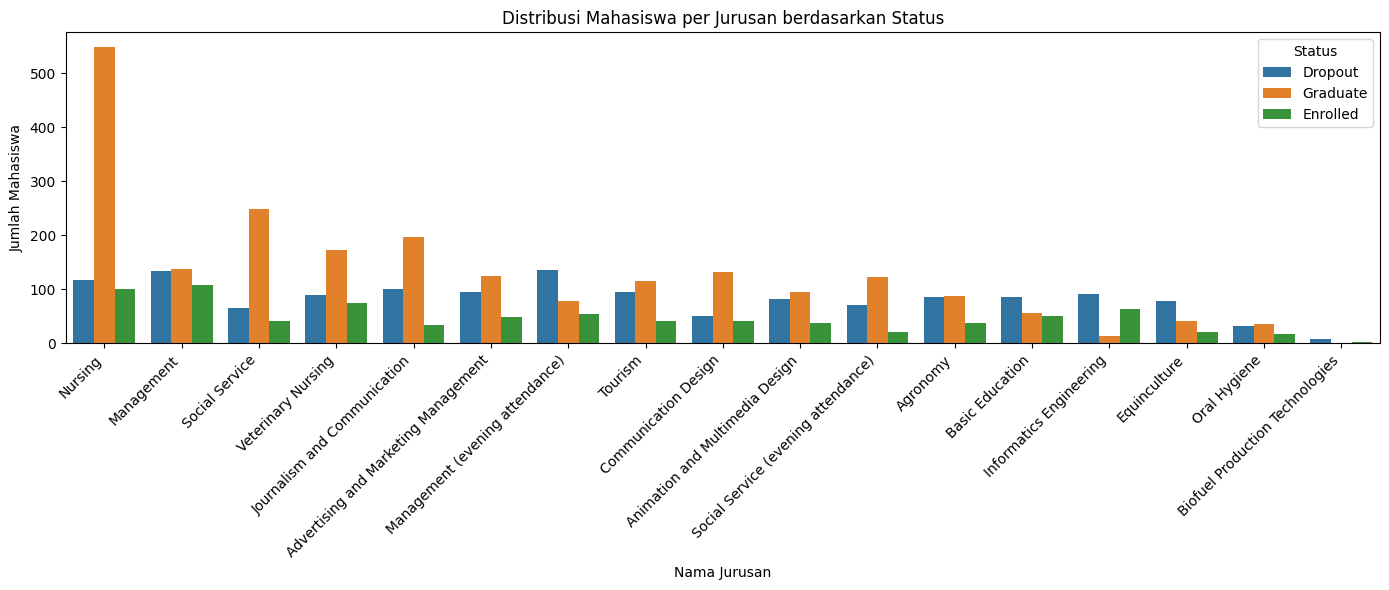

In [12]:
course_labels = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)',
}

# Ganti angka di kolom Course dengan nama jurusan
df['Course_Label'] = df['Course'].map(course_labels)

plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='Course_Label', hue='Status',
              order=df['Course_Label'].value_counts().index)

plt.title('Distribusi Mahasiswa per Jurusan berdasarkan Status')
plt.xlabel('Nama Jurusan')
plt.ylabel('Jumlah Mahasiswa')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


###  Scholarship Holder vs Status

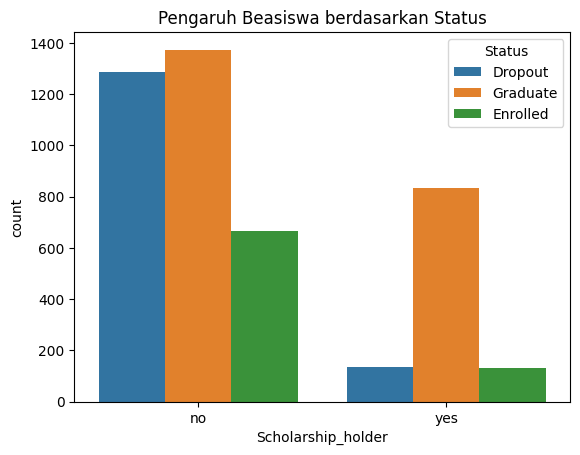

In [13]:
sns.countplot(data=df, x='Scholarship_holder', hue='Status')
plt.title('Pengaruh Beasiswa berdasarkan Status')
plt.xticks(ticks=[0, 1], labels=['no', 'yes'])
plt.show()

### Status Mahasiswa vs Umur

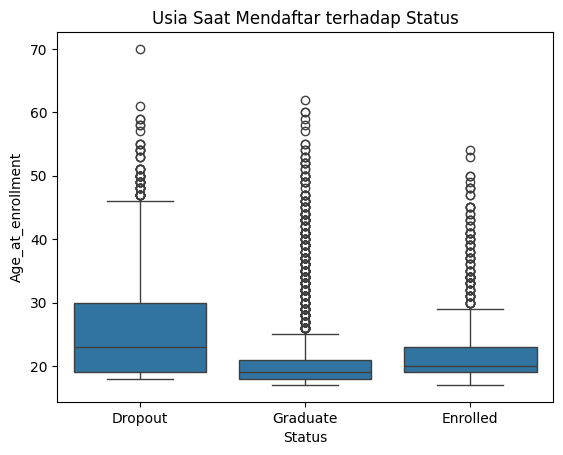

In [14]:
sns.boxplot(data=df, x='Status', y='Age_at_enrollment')
plt.title('Usia Saat Mendaftar terhadap Status')
plt.show()


In [15]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


- Tidak ditemukan missing values pada data

In [16]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(0)

- Tidak ditemukan data duplicate

### Cek Outlier Semua Kolom Numerik

In [17]:
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_mask = (data[column] < lower) | (data[column] > upper)
    return outlier_mask.sum(), lower, upper

# Tampilkan jumlah outlier dan ambang batas tiap kolom numerik
print("Jumlah Outlier dan Ambang Batas (IQR Method):\n")
for col in numeric_cols:
    count, low, high = detect_outliers_iqr(df, col)
    print(f"{col:<40} → {count:>5} outliers | batas: [{low:.2f}, {high:.2f}]")


Jumlah Outlier dan Ambang Batas (IQR Method):

Marital_status                           →   505 outliers | batas: [1.00, 1.00]
Application_mode                         →     0 outliers | batas: [-56.00, 96.00]
Application_order                        →   541 outliers | batas: [-0.50, 3.50]
Course                                   →   442 outliers | batas: [8378.50, 10262.50]
Daytime_evening_attendance               →   483 outliers | batas: [1.00, 1.00]
Previous_qualification                   →   707 outliers | batas: [1.00, 1.00]
Previous_qualification_grade             →   179 outliers | batas: [102.50, 162.50]
Nacionality                              →   110 outliers | batas: [1.00, 1.00]
Mothers_qualification                    →     0 outliers | batas: [-50.50, 89.50]
Fathers_qualification                    →     0 outliers | batas: [-48.00, 88.00]
Mothers_occupation                       →   182 outliers | batas: [-3.50, 16.50]
Fathers_occupation                       →   177 o

- Analisis outlier menggunakan metode IQR menunjukkan bahwa beberapa fitur memiliki nilai yang terdeteksi sebagai outlier, terutama pada fitur kategorikal numerik dan fitur dengan distribusi tidak seimbang. Namun, sebagian besar nilai masih tergolong valid secara konteks. Karena model XGBoost cukup robust terhadap outlier, maka tidak dilakukan penghapusan data.

# Data Preparation / Preprocessing

In [18]:
# Salin data
data = df.copy()

In [19]:
# Drop the non-numeric 'Course_Label' column
data = data.drop(columns=['Course_Label'])

### Encoding fitur target

In [20]:
# Konversi status menjadi biner: Dropout: 1 (positif) Not Dropout (Enrolled + Graduate): 0 (negatif)
data['Status_num'] = data['Status'].apply(lambda x: 1 if x.lower() == 'dropout' else 0)

# Cek hasil encoding
print(data['Status'].value_counts())
print(data['Status_num'].value_counts())

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64
Status_num
0    3003
1    1421
Name: count, dtype: int64


## Pisahkan fitur dan target

In [21]:
X = data.drop(columns=['Status', 'Status_num'])  # Semua kolom fitur
y = data['Status_num']

### Feature scaling

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Train-test split

In [23]:
# Terapkan SMOTE untuk menangani class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print(f"Sebelum SMOTE: {y.value_counts().to_dict()}")
print(f"Setelah SMOTE: {pd.Series(y_resampled).value_counts().to_dict()}")

Sebelum SMOTE: {0: 3003, 1: 1421}
Setelah SMOTE: {1: 3003, 0: 3003}


In [24]:
# Split train-test
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.2,
    random_state=42,
    stratify=y_resampled
)

print(f"Ukuran data training: {X_train.shape}, Ukuran data testing: {X_test.shape}")

Ukuran data training: (4804, 36), Ukuran data testing: (1202, 36)


# Modeling

In [25]:
# Inisialisasi model
model_xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Training model
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [26]:
# Prediksi
y_pred = model_xgb.predict(X_test)

# Evaluation

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       601
           1       0.92      0.92      0.92       601

    accuracy                           0.92      1202
   macro avg       0.92      0.92      0.92      1202
weighted avg       0.92      0.92      0.92      1202


Confusion Matrix:


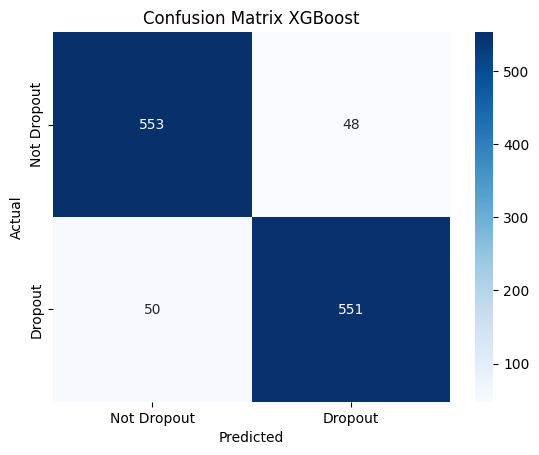

In [28]:
# Evaluasi model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Dropout", "Dropout"], yticklabels=["Not Dropout", "Dropout"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix XGBoost')
plt.show()

In [29]:
# Akurasi
acc = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {acc:.4f}")

Akurasi Model: 0.9185


- Model XGBoost berhasil mencapai akurasi 92% dalam memprediksi status dropout mahasiswa. Nilai precision, recall, dan f1-score untuk kedua kelas (Dropout dan Not Dropout) sama tinggi, yaitu 0.92, yang menunjukkan bahwa model seimbang dalam mendeteksi mahasiswa yang dropout maupun yang tidak. Confusion matrix menunjukkan jumlah kesalahan prediksi yang relatif kecil (48 dan 50 dari total 1202 data), menandakan performa model sangat baik dan layak digunakan dalam sistem deteksi dini dropout.

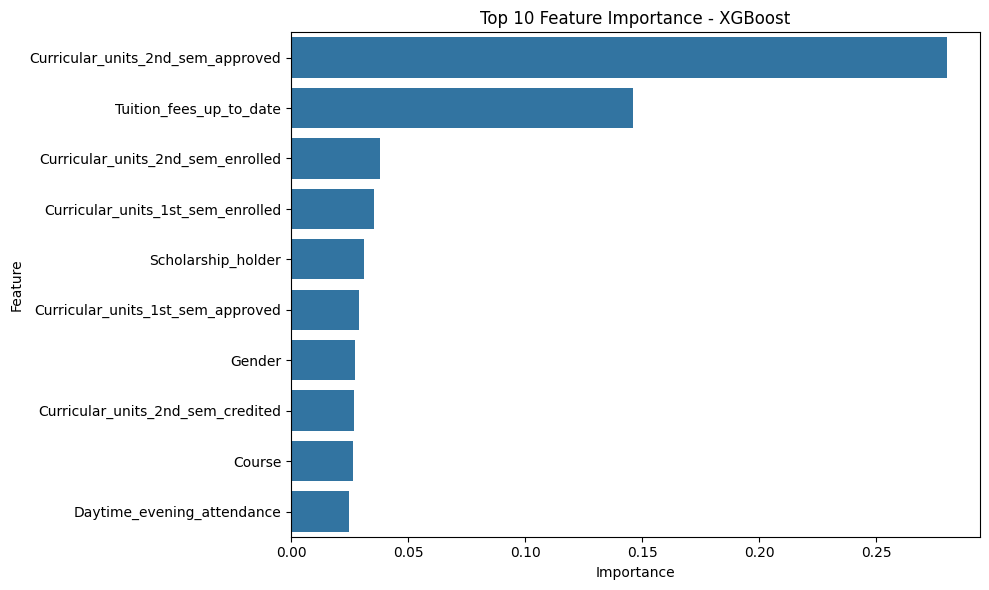

In [31]:
# Ambil feature importance dari model XGBoost
importances_xgb = model_xgb.feature_importances_
features = X.columns

# Buat DataFrame dan urutkan berdasarkan nilai importance
xgb_feat_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances_xgb
}).sort_values(by="Importance", ascending=False)

# Visualisasikan 10 fitur teratas
plt.figure(figsize=(10,6))
sns.barplot(data=xgb_feat_df.head(10), x="Importance", y="Feature")
plt.title("Top 10 Feature Importance - XGBoost")
plt.tight_layout()
plt.show()

**Insight Feature Importance XGBoost:**

Berdasarkan hasil feature importance, faktor yang paling berpengaruh dalam memprediksi dropout mahasiswa adalah:

- Curricular_units_2nd_sem_approved (jumlah mata kuliah yang disetujui di semester 2): fitur paling menentukan, menunjukkan bahwa keberhasilan akademik di semester 2 sangat krusial.
- Tuition_fees_up_to_date (status pembayaran UKT): mahasiswa yang tidak membayar tepat waktu memiliki kecenderungan lebih tinggi untuk dropout.
- Fitur akademik lainnya seperti jumlah mata kuliah yang diambil/diikuti di semester 1 dan 2 juga berperan penting.
- Fitur demografis seperti Scholarship_holder dan Gender juga memberikan kontribusi meskipun tidak sebesar performa akademik.

**Kesimpulan:**
Performa akademik (khususnya semester 2) dan kepatuhan terhadap kewajiban administratif seperti pembayaran UKT adalah indikator utama risiko dropout. Insight ini dapat digunakan sebagai dasar intervensi dini.

# Save Model

In [33]:
import joblib

# Simpan model XGB
joblib.dump(model_xgb, 'xgboost_dropout_model.joblib')

# Simpan scaler
joblib.dump(scaler, 'scaler.joblib')

# Simpan urutan kolom fitur
feature_order = list(X.columns)  # X adalah DataFrame sebelum scaling
joblib.dump(feature_order, 'feature_order.joblib')

print("Model, scaler, dan feature order berhasil disimpan.")

Model, scaler, dan feature order berhasil disimpan.
